In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import RandomState


In [14]:
df = pd.read_csv('passenger_flight.csv')
df.head()

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       0              1   52               1      0              160   
1       0              1   36               1      1             2863   
2       1              0   20               1      0              192   
3       1              1   44               1      1             3377   
4       0              1   49               1      0             1182   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      5                                  4   
1                      1                                  1   
2                      2                                  0   
3                      0                                  0   
4                      2                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              4  ...                       5   
1                       3              1  ...                       4   
2                       2              4  ...                       2   
3                       0              2  ...                       1   
4                       4              3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes  satisfaction  
0                      44.0             1  
1                       0.0             1  
2                       0.0             0  
3                       6.0             1  
4                      20.0             1  

[5 rows x 23 columns]

Splitting the Dataset

In [19]:
rng = RandomState()

train = df.sample(frac=0.8, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

train_backup = train.copy()
test_backup = test.copy()

train

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
22391       0              1   22               1      0              546   
7637        0              0   35               1      0               67   
5899        1              1   16               0      0              838   
6118        1              1   64               0      0              271   
12297       1              1   43               1      1             2168   
...       ...            ...  ...             ...    ...              ...   
5038        0              1   38               1      1             1705   
3589        0              1   45               1      1             1585   
7311        0              0   29               1      0             1185   
4794        1              1   19               0      0              861   
4739        0              1   59               1      0             1235   

       Inflight wifi service  Departure/Arrival time convenient  \
22391                      2                                  3   
7637                       3                                  1   
5899                       4                                  4   
6118                       3                                  0   
12297                      3                                  3   
...                      ...                                ...   
5038                       4                                  4   
3589                       5                                  5   
7311                       2                                  2   
4794                       1                                  5   
4739                       3                                  5   

       Ease of Online booking  Gate location  ...  Inflight entertainment  \
22391                       3              3  ...                       2   
7637                        3              3  ...                       1   
5899                        4              3  ...                       3   
6118                        2              3  ...                       4   
12297                       3              3  ...                       3   
...                       ...            ...  ...                     ...   
5038                        2              4  ...                       5   
3589                        5              5  ...                       2   
7311                        2              4  ...                       3   
4794                        1              3  ...                       4   
4739                        5              5  ...                       3   

       On-board service  Leg room service  Baggage handling  Checkin service  \
22391                 3                 1                 3                4   
7637                  2                 5                 3                2   
5899                  4                 5                 4                5   
6118                  3                 5                 3                4   
12297                 4                 2                 2                3   
...                 ...               ...               ...              ...   
5038                  5                 5                 5                1   
3589                  2                 2                 2                4   
7311                  1                 4                 3                2   
4794                  3                 2                 4                4   
4739                  3                 3                 3                2   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
22391                 3            2                           0   
7637                  4            1                           4   
5899                  4            3                           0   
6118                  4            4                           0   
12297                 3            3               

Visualizing the dataset

In [26]:
desc = pd.DataFrame(train.describe(include = 'all').transpose())

In [27]:

def summary_stats(df): 
    print(f'The shape of the data is: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['data type'])
    summary['Number of missing values'] = df.isnull().sum().values 
    summary['% of missing values'] = df.isnull().sum().values / len(df) * 100 
    summary['s.d.'] = desc['std'].values
    summary['min value'] = desc['min'].values
    summary['mean value'] = desc['mean'].values
    summary['max value'] = desc['max'].values
    summary['mode value'] = df.mode().values[0]
    return summary

summary_stats(train)

The shape of the data is: (20781, 23)


data type  Number of missing values  \
Gender                                int64                         0   
Customer Type                         int64                         0   
Age                                   int64                         0   
Type of Travel                        int64                         0   
Class                                 int64                         0   
Flight Distance                       int64                         0   
Inflight wifi service                 int64                         0   
Departure/Arrival time convenient     int64                         0   
Ease of Online booking                int64                         0   
Gate location                         int64                         0   
Food and drink                        int64                         0   
Online boarding                       int64                         0   
Seat comfort                          int64                         0   
Inflight entertainment                int64                         0   
On-board service                      int64                         0   
Leg room service                      int64                         0   
Baggage handling                      int64                         0   
Checkin service                       int64                         0   
Inflight service                      int64                         0   
Cleanliness                           int64                         0   
Departure Delay in Minutes            int64                         0   
Arrival Delay in Minutes            float64                        69   
satisfaction                          int64                         0   

                                   % of missing values        s.d.  min value  \
Gender                                        0.000000    0.499919        0.0   
Customer Type                                 0.000000    0.387544        0.0   
Age                                           0.000000   15.147970        7.0   
Type of Travel                                0.000000    0.461225        0.0   
Class                                         0.000000    0.497200        0.0   
Flight Distance                               0.000000  998.427095       31.0   
Inflight wifi service                         0.000000    1.338722        0.0   
Departure/Arrival time convenient             0.000000    1.534862        0.0   
Ease of Online booking                        0.000000    1.415263        0.0   
Gate location                                 0.000000    1.282821        1.0   
Food and drink                                0.000000    1.331770        0.0   
Online boarding                               0.000000    1.358573        0.0   
Seat comfort                                  0.000000    1.318317        1.0   
Inflight entertainment                        0.000000    1.337118        0.0   
On-board service                              0.000000    1.282326        0.0   
Leg room service                              0.000000    1.320474        0.0   
Baggage handling                              0.000000    1.176162        1.0   
Checkin service                               0.000000    1.269396        1.0   
Inflight service                              0.000000    1.180293        0.0   
Cleanliness                                   0.000000    1.319597        0.0   
Departure Delay in Minutes                    0.000000   36.507709        0.0   
Arrival Delay in Minutes                      0.332034   36.583140        0.0   
satisfaction                                  0.000000    0.495964        0.0   

                                    mean value  max value  mode value  
Gender                                0.490352        1.0         0.0  
Customer Type                         0.815938        1.0         1.0  
Age                                  39.647755       85.0        25.0  
Type of Travel                        0.693085  

Display a list of each categories correlation with satisfaction

In [28]:
train.corr().loc['satisfaction'].abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.495299
Type of Travel                       0.451678
Class                                0.436971
Inflight entertainment               0.397225
Seat comfort                         0.344934
On-board service                     0.319328
Cleanliness                          0.315088
Leg room service                     0.309861
Flight Distance                      0.292576
Inflight wifi service                0.284361
Baggage handling                     0.254563
Inflight service                     0.244383
Checkin service                      0.242065
Food and drink                       0.214413
Customer Type                        0.178922
Ease of Online booking               0.158354
Age                                  0.118983
Departure/Arrival time convenient    0.066440
Arrival Delay in Minutes             0.063426
Departure Delay in Minutes           0.053570
Gate location                     

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

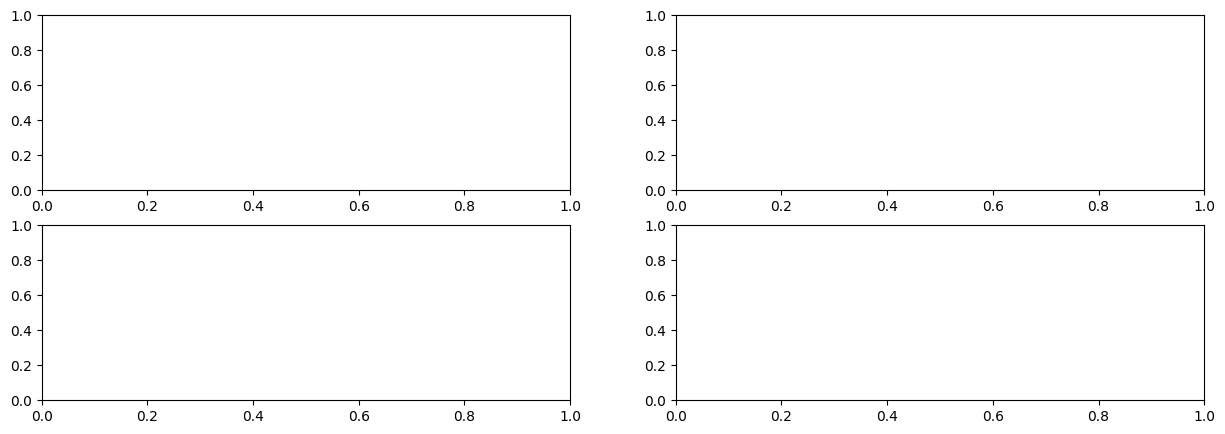

In [42]:
numeric = ["Age", "Flight Distance", "Departure Delay in Minutes"]
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
for i, column in enumerate(numeric):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    sns.kdeplot(data=train, x=column, ax=ax)

plt.tight_layout()
plt.show()

Multivariate Analysis (not advisable for this dataset hahaha)

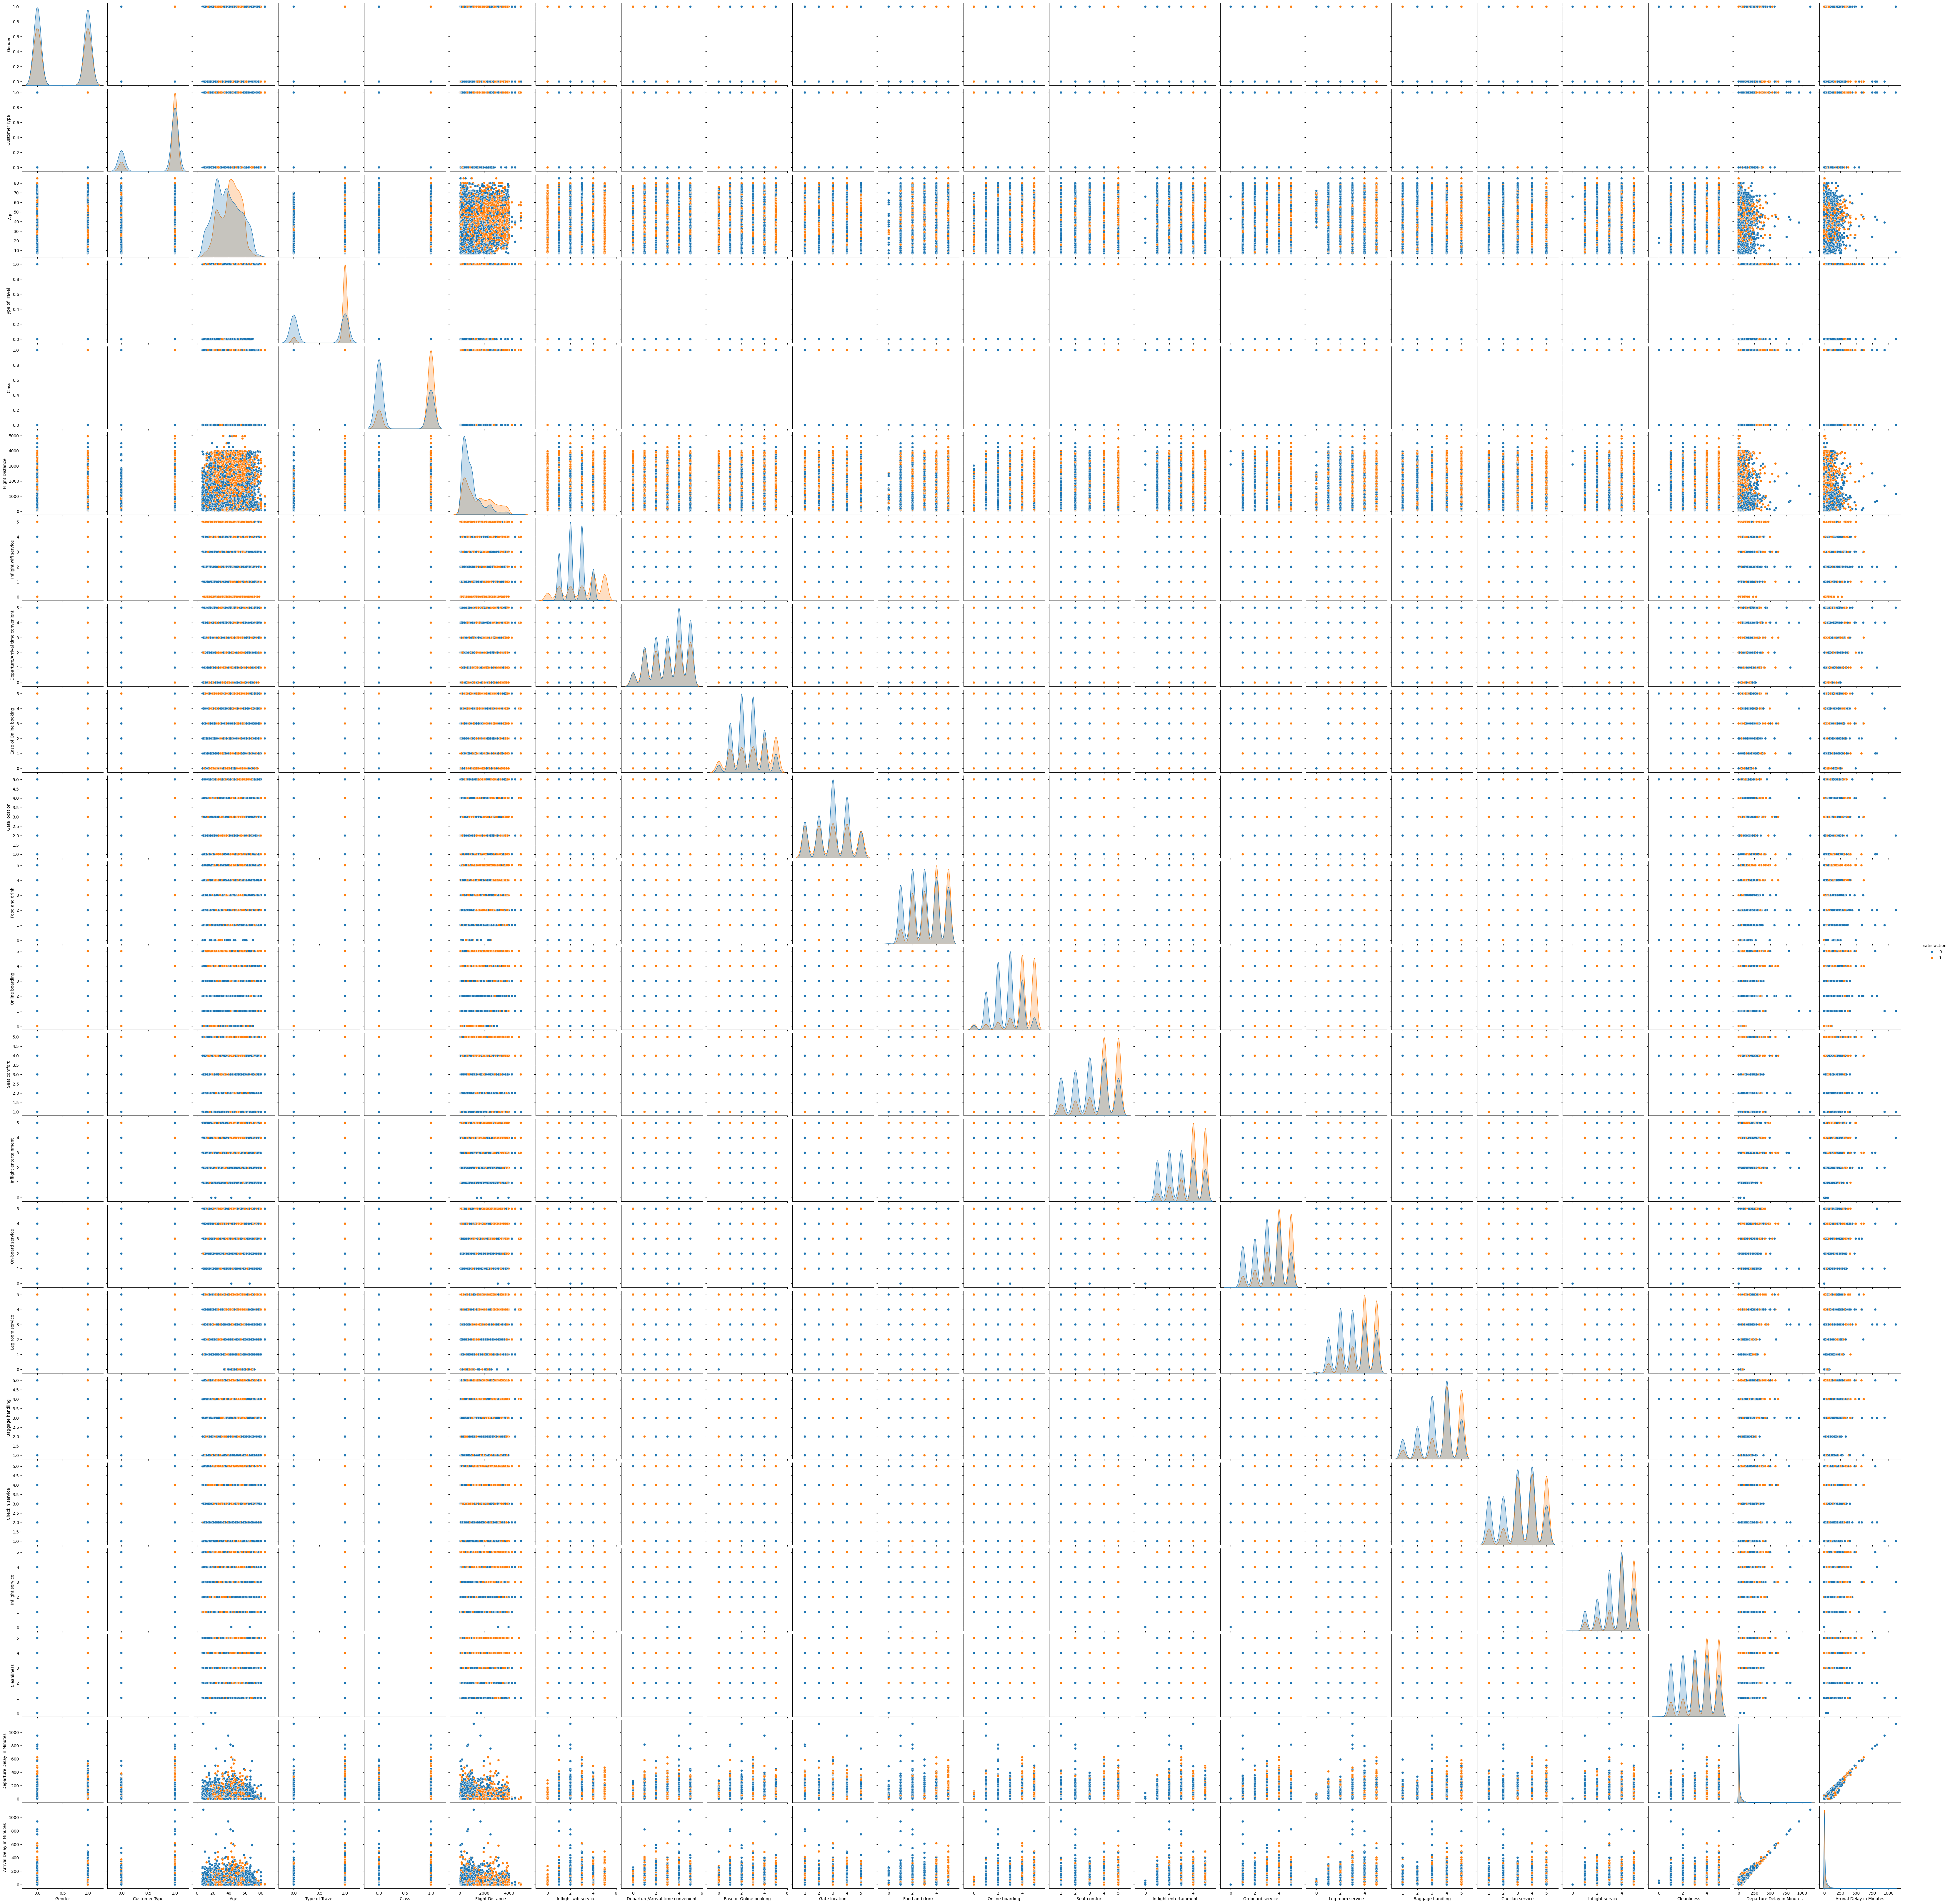

In [11]:
sns.pairplot(df, hue="satisfaction", height=3)